In [ ]:
# S02-hw-dataset.csv


In [1]:
#### 2.3.1. Загрузка данных и первичный осмотр

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file = 'S02-hw-dataset.csv'
data = pd.read_csv(file)
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [2]:
''' Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).
   
'''

data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
data.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [10]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [11]:
#### 2.3.2. Пропуски, дубликаты и базовый контроль качества

# доля пропусков в каждом столбце

missing = data.isna().mean() * 100 # в процентах
missing

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

In [13]:
# дубликаты

duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Дублирующие строки имеются, их количество {duplicates}")

Дублирующие строки имеются, их количество 1


In [17]:
# подозрительные случаи


# проверка уникальности user_id
duplicate_ids = data['user_id'].duplicated().sum()
if duplicate_ids > 0:
    print(f"Дублирующие идентификаторы имеются, их количество {duplicates}")
    dup_ids = data[data['user_id'].duplicated(keep=False)]['user_id'].unique()
    print(f"Повторяющиеся ID: {dup_ids}")

Дублирующие идентификаторы имеются, их количество 1
Повторяющиеся ID: [10]


In [20]:
# проверка возраста на реалистичность
# считаю, что покупки и доход возможны от 14 до 100 лет
age_mask = (data['age'] < 14) | (data['age'] > 100)
age_count = age_mask.sum()
print(f"Нереалистичных записей (по возрасту): {age_count}")
print(data.loc[age_mask, ['user_id', 'age', 'country', 'purchases', 'revenue']])

Нереалистичных записей (по возрасту): 2
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488


In [23]:
# проверка количества покупок

negative = (data['purchases'] < 0).sum()
print(f"Подозрительное количество покупок: {negative}")
if negative > 0:
    print(data.loc[data['purchases'] < 0, ['user_id', 'age', 'country', 'purchases', 'revenue']])

Подозрительное количество покупок: 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [24]:
# Проверка выручки
negative_r = (data['revenue'] < 0).sum()
print(f"Отрицательная выручка: {negative_r}")

Отрицательная выручка: 0


In [26]:
# Проверка соответствия количества покупок и выручки

# Если не ноль покупок, выручка не может быть ноль
tmp1 = (data['purchases'] > 0) & (data['revenue'] == 0)
print(f"Покупок != 0, но выручка = 0: {tmp1.sum()}")

# Если покупок нет, выручка не может быть НЕ ноль
tmp2 = (data['purchases'] == 0) & (data['revenue'] > 0)
print(f"Покупок = 0, но выручка = 0: {tmp2.sum()}")

Покупок != 0, но выручка = 0: 1
Покупок = 0, но выручка = 0: 0


Обнаруженные проблемы в данных:
1) практически 5% пропущенных значений в столбце "возраст"
2) одна запись полностью дублируется
3) две записи имеют нереалистичный возраст (либо меньше 14 лет, либо больше 100 лет)
4) одна запись с отрицательным количеством покупок
5) одна запись, где совершались покупки, но выручка ноль

В идеале для дальнейшей работы требовалось бы удалить эти выбросы

In [45]:
#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

# считаем частоты стран
country_counts = data['country'].value_counts()
all_country = data['country'].count()
country_percent = country_counts / all_country * 100
country_stats = pd.DataFrame({
    'Количество': country_counts,
    'Доля, %': country_percent})

print(country_stats)

         Количество    Доля, %
country                       
RU               13  31.707317
FR               12  29.268293
US                8  19.512195
DE                6  14.634146
CN                2   4.878049


In [46]:
# группируем по странам
grouped_by_country = data.groupby('country')

grouped_by_country.size()

country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

In [47]:
# средний возраст покупателей по странам

print(grouped_by_country['age'].median())

country
CN    24.0
DE    35.0
FR    42.0
RU    26.0
US    39.0
Name: age, dtype: float64


In [48]:
grouped_by_country = grouped_by_country.agg({
    'user_id': 'count',
    'age': ['mean', 'min', 'max'],
    'purchases': ['mean', 'sum', 'median'],
    'revenue': ['mean', 'sum', 'median']})

grouped_by_country.columns = [
    'Кол-во_пользователей',
    'Ср_возраст', 'Мин_возраст', 'Макс_возраст',
    'Ср_покупок', 'Сум_покупок', 'Медиана_покупок',
    'Ср_выручка', 'Сум_выручка', 'Медиана_выручка'
]


# вся статистика по группировке по странам
print(grouped_by_country)

         Кол-во_пользователей  Ср_возраст  Мин_возраст  Макс_возраст  \
country                                                                
CN                          2   24.000000         20.0          28.0   
DE                          6   34.600000         18.0          52.0   
FR                         12   46.250000         22.0         120.0   
RU                         13   30.076923          5.0          54.0   
US                          8   36.714286         23.0          51.0   

         Ср_покупок  Сум_покупок  Медиана_покупок   Ср_выручка  Сум_выручка  \
country                                                                       
CN         4.500000            9              4.5  1054.000000         2108   
DE         6.500000           39              6.0  1445.500000         8673   
FR         4.250000           51              6.0   675.916667         8111   
RU         4.769231           62              6.0   790.076923        10271   
US         4.625000  

In [53]:
# создаем возрастные группы
data['age_group'] = pd.cut(
    data['age'],
    bins=[0, 18, 25, 35, 50, 65, 121],
    labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+'],
    right=False  # [0, 18)
)

data['age_group'] = data['age_group'].cat.add_categories('Не указан')
data.loc[data['age'].isna(), 'age_group'] = 'Не указан'

data.head()

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,26-35
1,2,24.0,RU,5,1115,18-25
2,3,52.0,FR,7,399,51-65
3,4,31.0,RU,6,654,26-35
4,5,NaN,DE,6,1296,Не указан


In [54]:
# распределение групп по возрасту
age_group_counts = data['age_group'].value_counts()
age_group_all = data['age_group'].count()
age_group_percent = age_group_counts / age_group_all * 100

age_group_stats = pd.DataFrame({
    'Количество': age_group_counts,
    'Доля, %': age_group_percent.round(1)
})
print(age_group_stats)

           Количество  Доля, %
age_group                     
36-50              11     26.8
26-35              10     24.4
18-25              10     24.4
51-65               6     14.6
Не указан           2      4.9
<18                 1      2.4
65+                 1      2.4


In [55]:
# средние показатели по возрасту
age_group_analysis = data.groupby('age_group').agg({
    'purchases': 'mean',
    'revenue': 'mean',
    'user_id': 'count'
}).round(2)
age_group_analysis.columns = ['Ср_покупок', 'Ср_выручка', 'Кол-во_пользователей']
print(age_group_analysis)

           Ср_покупок  Ср_выручка  Кол-во_пользователей
age_group                                              
<18              8.00     1488.00                     1
18-25            4.70      617.10                    10
26-35            5.30     1009.60                    10
36-50            4.18      870.55                    11
51-65            5.00      596.67                     6
65+             -1.00      785.00                     1
Не указан        7.50      963.00                     2


C:\Users\Notebook-KSU\AppData\Local\Temp\ipykernel_8520\2873918360.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = data.groupby('age_group').agg({


Явно доминируют представители России и Франции. Причем представители Франции имеют средний возраст 46 лет, пока остальные страны от 24 до 36. Это объясняется выбросом с 120-летним человеком.
Представители Германии совершают в среднем на 2 покупки больше, чем остальные страны. Так же их выручка выше, чем у других стран.

При группировке по возрасту можно заметить, что средняя выручка больше всего в группе <18 лет, но там находится всего один представитель, совершивший целых 8 покупок. Больше всего представителей в группе 36-50 лет, они совершили в среднем 4 покупки с выручкой 870.

In [59]:
### 2.4. Визуализация данных в Matplotlib

In [60]:
data = pd.read_csv('S02-hw-dataset.csv')

# удаляем строки с выбросами
data_clean = data[data['purchases'] >= 0].copy()

unrealistic_age_mask = (data_clean['age'] < 14) | (data_clean['age'] > 100)
data_clean = data_clean[~unrealistic_age_mask].copy()

data_clean = data_clean.drop_duplicates()

print(f"Итоговый размер очищенного датасета: {len(data_clean)} строк")

Итоговый размер очищенного датасета: 38 строк


In [65]:
# возрастные группы для очищенных данных
age_categories = ['<18', '18-25', '26-35', '36-50', '51-65', '65+', 'Не указан']
data_clean['age_group'] = 'Не указан'

age_known_mask = data_clean['age'].notna()
data_clean.loc[age_known_mask, 'age_group'] = pd.cut(
    data_clean.loc[age_known_mask, 'age'],
    bins=[0, 18, 26, 36, 51, 66, 101],
    labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+'],
    right=False
)

data_clean['age_group'] = pd.Categorical(
    data_clean['age_group'], 
    categories=age_categories,
    ordered=True
)

data_clean.head()


,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,18-25
1,2,24.0,RU,5,1115,18-25
2,3,52.0,FR,7,399,51-65
3,4,31.0,RU,6,654,26-35
4,5,NaN,DE,6,1296,Не указан


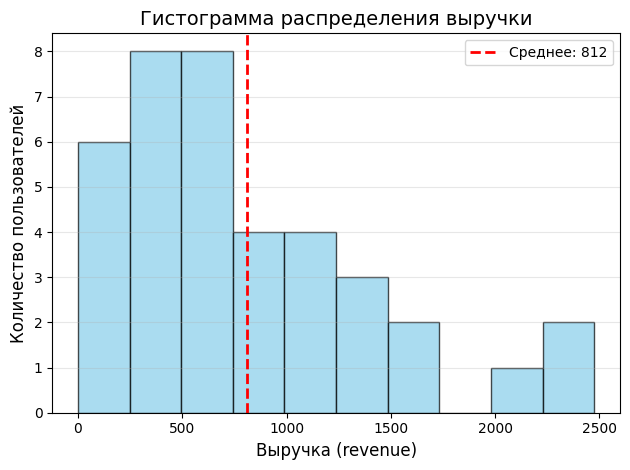

In [68]:
plt.hist(data_clean['revenue'], bins=10, 
         edgecolor='black', alpha=0.7, color='skyblue')

plt.xlabel('Выручка (revenue)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Гистограмма распределения выручки', fontsize=14)
plt.grid(axis='y', alpha=0.3)

mean_revenue = data_clean['revenue'].mean()
plt.axvline(mean_revenue, color='red', linestyle='--', linewidth=2, 
            label=f'Среднее: {mean_revenue:.0f}')

plt.legend()
plt.tight_layout()
plt.savefig('figures/revenue_histogram.png', dpi=300)
plt.show()

C:\Users\Notebook-KSU\AppData\Local\Temp\ipykernel_8520\2408614364.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(revenue_by_country, labels=country_order, patch_artist=True)


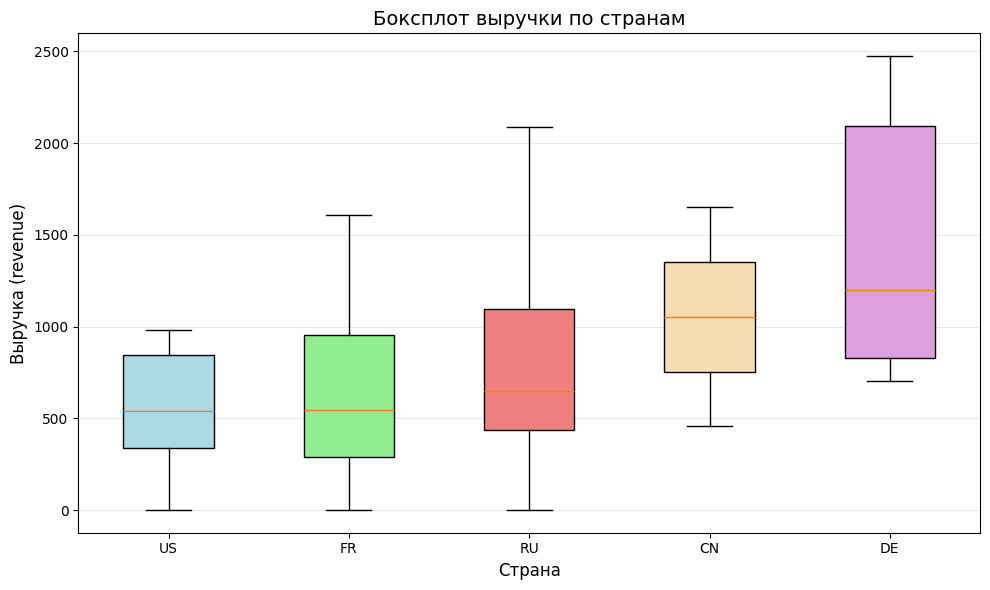

In [70]:
plt.figure(figsize=(10, 6))

country_order = data_clean.groupby('country')['revenue'].median().sort_values().index
revenue_by_country = [data_clean[data_clean['country'] == c]['revenue'] for c in country_order]


box = plt.boxplot(revenue_by_country, labels=country_order, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'wheat', 'plum']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка (revenue)', fontsize=12)
plt.title('Боксплот выручки по странам', fontsize=14)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/revenue_boxplot.png', dpi=300)
plt.show()

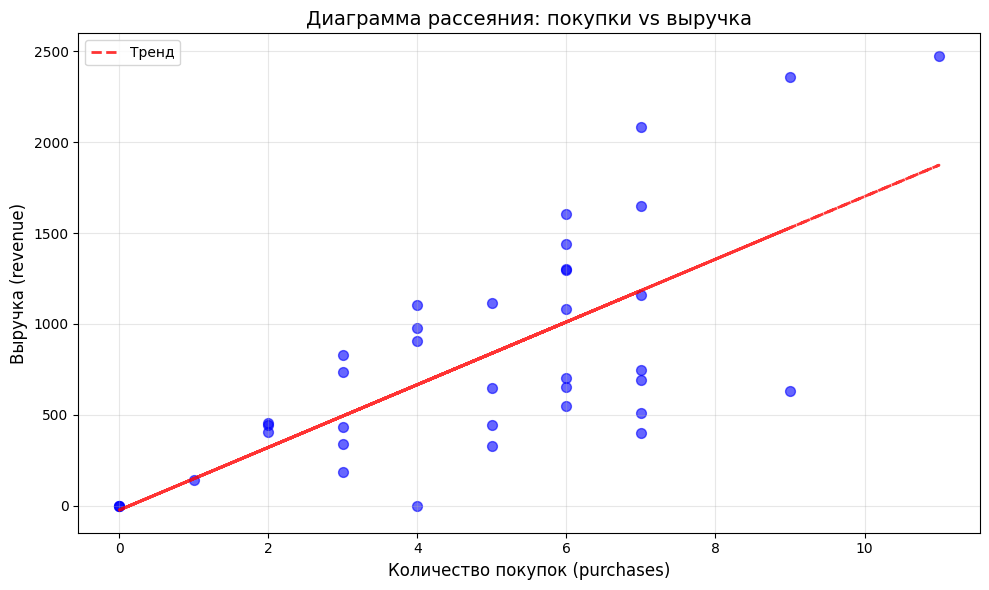

In [72]:
plt.figure(figsize=(10, 6))

plt.scatter(data_clean['purchases'], data_clean['revenue'], 
            alpha=0.6, s=50, color='blue')

plt.xlabel('Количество покупок (purchases)', fontsize=12)
plt.ylabel('Выручка (revenue)', fontsize=12)
plt.title('Диаграмма рассеяния: покупки vs выручка', fontsize=14)
plt.grid(alpha=0.3)


x = data_clean['purchases']
y = data_clean['revenue']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8, linewidth=2, label='Тренд')

plt.legend()
plt.tight_layout()
plt.savefig('figures/scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()